In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print (tf.__version__)


1.11.0


##### Fashion MNIST data
##### This dataset contains 70,000 grayscale images in 10 categories. 
##### The images show individual articles of clothing at low resolution (28 by 28 pixels)

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

60000

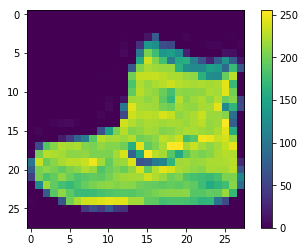

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [16]:
train_images= train_images /255.0
test_images= test_images /255.0

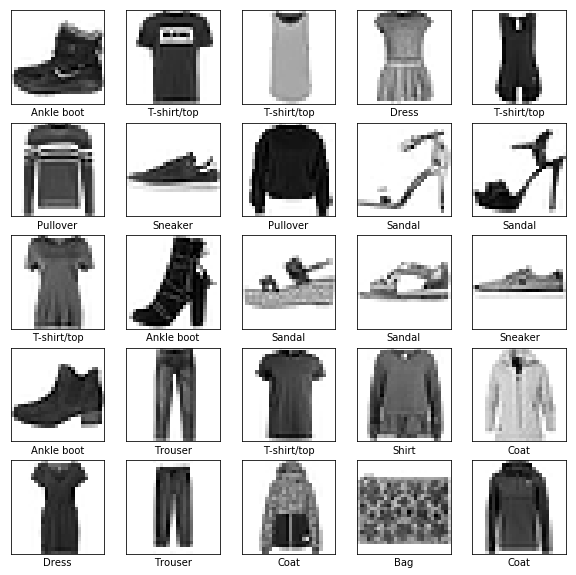

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
    

In [19]:
#setup the layer
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu ),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [20]:
#compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#Train the model
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.4984 - acc: 0.8256
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3766 - acc: 0.8651
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3387 - acc: 0.8768
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3153 - acc: 0.8841
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2979 - acc: 0.8897
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2829 - acc: 0.8953
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2680 - acc: 0.8996
Epoch 8/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2600 - acc: 0.9042
Epoch 9/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2491 - acc: 0.9072
Epoch 10/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2405 - acc: 0.910

In [22]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/step
Test accuracy: 0.8819


In [26]:
# Make prediction
predictions=model.predict(test_images)
predictions[0]

array([5.1628493e-08, 1.5090060e-15, 4.9398182e-14, 5.3240070e-18,
       9.2713590e-16, 6.1216968e-05, 4.6586283e-11, 5.3771511e-03,
       2.5078885e-11, 9.9456161e-01], dtype=float32)

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

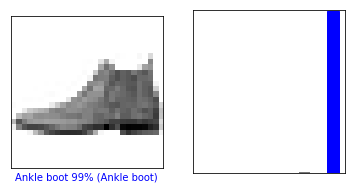

In [30]:
# let's look at the 0th no of images prediction and prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)


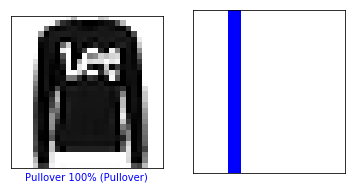

In [31]:
# 2nd image
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

Success


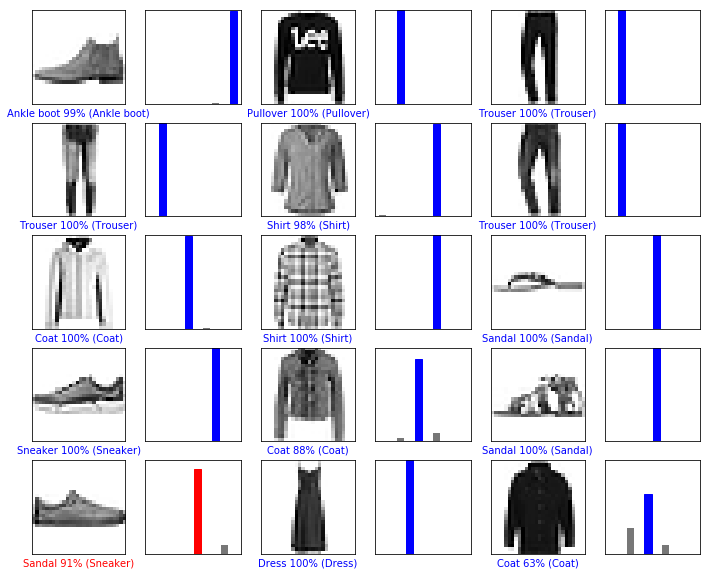

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
print("Success")

90


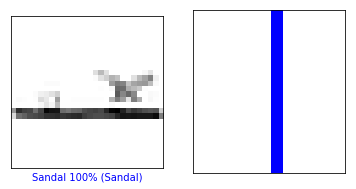

In [36]:
x=int(input())
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(x,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(x,predictions,test_labels)